In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nelpy as nel
from scipy.io import savemat

/home/kemerelab/nelpy/nelpy/plotting/decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


## Experiment Paradigm

In [3]:
d = np.load('/home/kemerelab/Downloads/mazesEEG/RatS-Day5TwoNovel-2020-12-04_07-55-09.paradigm.npy',allow_pickle=True)
period_names = d.item(0)['epochs']['label'].values
period = np.vstack((d.item(0)['epochs']['start'].values,d.item(0)['epochs']['stop'].values))
period_bounds = nel.EpochArray(period.T)
period_names, period_bounds.data

(array(['pre', 'maze1', 'post1', 'maze2', 'post2'], dtype=object),
 array([[    0, 11066],
        [11070, 13970],
        [13972, 20754],
        [20756, 24004],
        [24006, 42305]]))

## Load position data
<a id='maze2d1d'></a>

In [7]:
# Define maze ID
maze_id = 1
period_names[maze_id]

'maze2'

In [8]:
position = np.load('RatS-Day5TwoNovel-2020-12-04_07-55-09_position.npy',allow_pickle=True)
timestamps = position.item(0)['time']
x1 = position.item(0)['x']
y1 = position.item(0)['y']

timestamps.shape, x1.shape, y1.shape

((2538347,), (2538347,), (2538347,))

### Get running epochs of Maze(i)

In [10]:
# all time stamps when animal was in maze i
mazetime = timestamps[(timestamps>=period_bounds.data[maze_id,0]) & (timestamps<period_bounds.data[maze_id,1])] 
# all position when animal was in maze i
pos = nel.AnalogSignalArray(np.vstack((x1, y1)), timestamps=np.array(timestamps), support=period_bounds[maze_id], fs=60)

mazetime.shape, pos.data.shape

((194880,), (2, 194880))

In [11]:
pos_2d = pos.data
pos_2d.shape

(2, 194880)

## 2D to 1D position

### maze1

[jump to maze2](#maze2)

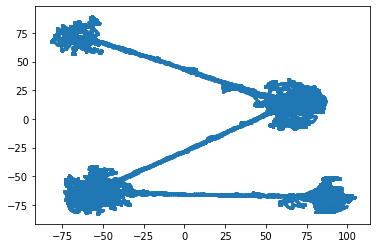

In [11]:
plt.scatter(pos_2d[0,:],pos_2d[1,:],s=3)

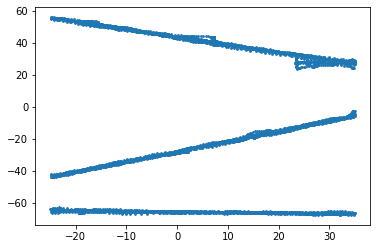

In [12]:
idx_arm = np.where((pos_2d[0,:]<35)&(pos_2d[0,:]>-25))[0]
plt.scatter(pos_2d[0,idx_arm],pos_2d[1,idx_arm],s=3)

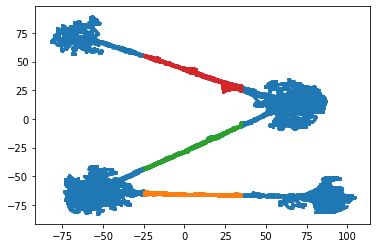

In [13]:
idx_arm1 = idx_arm[pos_2d[1,idx_arm]<-55]
idx_arm2 = idx_arm[(pos_2d[1,idx_arm]>-50)&(pos_2d[1,idx_arm]<10)]
idx_arm3 = idx_arm[pos_2d[1,idx_arm]>10]
plt.scatter(pos_2d[0,:],pos_2d[1,:],s=3)
plt.scatter(pos_2d[0,idx_arm1],pos_2d[1,idx_arm1],s=3)
plt.scatter(pos_2d[0,idx_arm2],pos_2d[1,idx_arm2],s=3)
plt.scatter(pos_2d[0,idx_arm3],pos_2d[1,idx_arm3],s=3)

In [14]:
from sklearn.decomposition import PCA

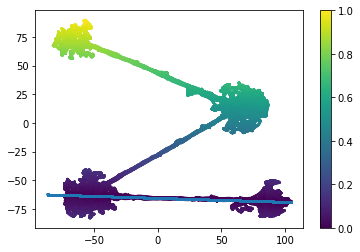

In [15]:
pca1 = PCA(n_components=1)
pca1.fit(pos_2d[:,idx_arm1].T)
X1 = pca1.transform(pos_2d.T)
X1_2d = pca1.inverse_transform(X1).T
scores1 = np.linalg.norm(pos_2d-X1_2d,axis=0)

plt.scatter(pos_2d[0,:],pos_2d[1,:],s=3,c=scores1)
plt.scatter(X1_2d[0,:],X1_2d[1,:],s=3)
plt.colorbar()

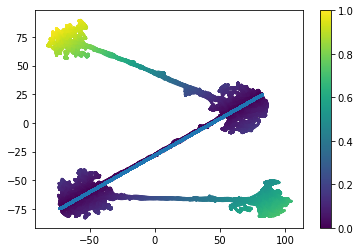

In [17]:
pca2 = PCA(n_components=1)
pca2.fit(pos_2d[:,idx_arm2].T)
X2 = pca2.transform(pos_2d.T)
X2_2d = pca2.inverse_transform(X2).T
scores2 = np.linalg.norm(pos_2d-X2_2d,axis=0)

plt.scatter(pos_2d[0,:],pos_2d[1,:],s=3,c=scores2)
plt.scatter(X2_2d[0,:],X2_2d[1,:],s=3)
plt.colorbar()

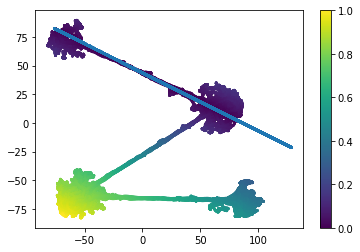

In [18]:
pca3 = PCA(n_components=1)
pca3.fit(pos_2d[:,idx_arm3].T)
X3 = pca3.transform(pos_2d.T)
X3_2d = pca3.inverse_transform(X3).T
scores3 = np.linalg.norm(pos_2d-X3_2d,axis=0)

plt.scatter(pos_2d[0,:],pos_2d[1,:],s=3,c=scores3)
plt.scatter(X3_2d[0,:],X3_2d[1,:],s=3)
plt.colorbar()

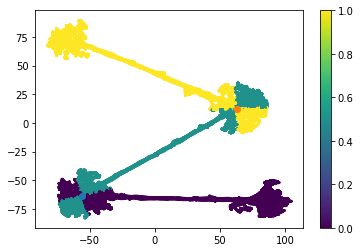

In [19]:
arm = np.argmin(np.vstack((scores1,scores2,scores3)),axis=0)
turn12 = np.argmin(np.sqrt(scores1**2+scores2**2))
turn23 = np.argmin(np.sqrt(scores3**2+scores2**2))
plt.scatter(pos_2d[0,:],pos_2d[1,:],s=3,c=arm)
plt.scatter(pos_2d[0,turn12],pos_2d[1,turn12])
plt.scatter(pos_2d[0,turn23],pos_2d[1,turn23])
plt.colorbar()

178.61546059133042

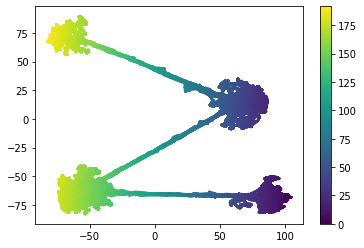

In [20]:
X1 = -X1
X1 = X1-X1.min()
plt.scatter(pos_2d[0,:],pos_2d[1,:],s=3,c=X1)
plt.colorbar()
X1[arm==0].max()-X1[arm==0].min()

In [21]:
pos_transformed = np.zeros((pos_2d.shape[1],1))

In [23]:
X1[X1>X1[turn12]]=X1[turn12]
pos_transformed[arm==0] = X1[arm==0]

184.94287718241463

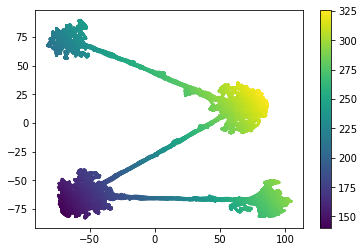

In [24]:
X2 = -X2
X2 = X2-X2[turn12]+X1[turn12]
plt.scatter(pos_2d[0,:],pos_2d[1,:],s=3,c=X2)
plt.colorbar()
X2[arm==1].max()-X2[arm==1].min()

In [25]:
X2[X2<X2[turn12]]=X2[turn12]
X2[X2>X2[turn23]]=X2[turn23]
pos_transformed[arm==1] = X2[arm==1]

178.95677837111225

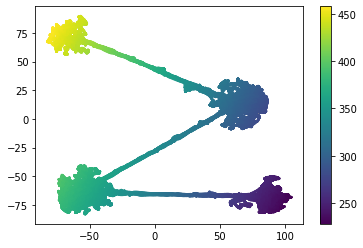

In [26]:
X3 = X3-X3[turn23]+X2[turn23]
plt.scatter(pos_2d[0,:],pos_2d[1,:],s=3,c=X3)
plt.colorbar()
X3[arm==2].max()-X3[arm==2].min()

In [27]:
X3[X3<X3[turn23]]=X3[turn23]
pos_transformed[arm==2] = X3[arm==2]

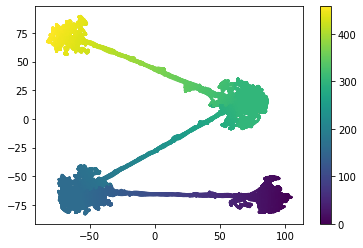

In [28]:
plt.scatter(pos_2d[0,:],pos_2d[1,:],s=3,c=pos_transformed)
plt.colorbar()

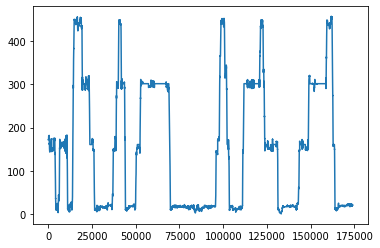

In [41]:
plt.plot(pos_transformed)
pos_linear = pos_transformed.squeeze()

In [42]:
pos_linear.shape,mazetime.shape

((174000,), (174000,))

In [44]:
pos_lin = nel.AnalogSignalArray(pos_linear, timestamps=mazetime)
pos_lin

<AnalogSignalArray at 0x7f48aa05d2e0: 1 signals> for a total of 48:20:001 minutes

In [45]:
nel.save_pkl('maze1_raw_pos.nel',pos_lin)

### maze2
<a id='maze2'></a>

[Start of maze 2D to 1D](#maze2d1d)

In [12]:
from scipy import interpolate
from scipy.signal import savgol_filter
from sklearn.manifold import Isomap

In [14]:
pos_2d.shape

(2, 194880)

(2, 4305)

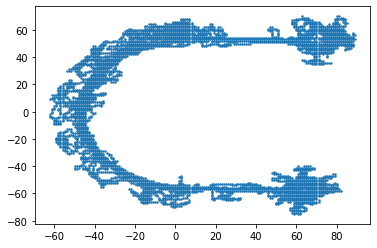

In [20]:
pos_2d_round = np.round(pos_2d,decimals=0)
pos_2d_round_list = np.unique(pos_2d_round,axis=1)
plt.scatter(pos_2d_round_list[0,:],pos_2d_round_list[1,:],s=2)
pos_2d_round_list.shape

In [16]:
isomap = Isomap(n_components=1, n_neighbors=50, neighbors_algorithm='auto')
X_isomap = isomap.fit_transform(pos_2d_round_list.T)
X_isomap.shape

(4305, 1)

In [37]:
pos_transformed = np.zeros((pos_2d.shape[1],))
for i in range(pos_2d_round_list.shape[1]):
    match = (pos_2d_round[0,:]==pos_2d_round_list[0,i])&(pos_2d_round[1,:]==pos_2d_round_list[1,i])
    pos_transformed[match] = X_isomap[i]
pos_transformed.shape

(194880,)

Text(0.5, 1.0, 'maze2')

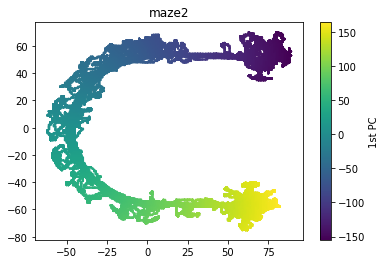

In [38]:
plt.scatter(pos_2d_round[0,:],pos_2d_round[1,:],s=2,c=pos_transformed)
cbar = plt.colorbar()
cbar.set_label('1st PC')
plt.title(period_names[maze_id])

In [44]:
np.min(pos_transformed),pos_1d_list[0]

(-154.75902580647497, -154.75902580647497)

Text(0.5, 1.0, 'maze2')

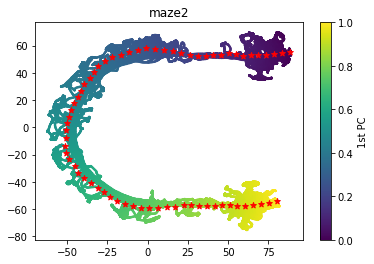

In [51]:
f = interpolate.interp1d(np.squeeze(X_isomap),pos_2d_round_list)
pos_1d_list = np.linspace(np.min(X_isomap),np.max(X_isomap),200)
xy = f(pos_1d_list)
xy_sm = savgol_filter(xy, 31, 2)

plt.scatter(pos_2d[0,:],pos_2d[1,:],s=2,c=pos_transformed)
plt.scatter(xy_sm[0,::3],xy_sm[1,::3],marker='*',c='r')
cbar = plt.colorbar()
cbar.set_label('1st PC')
plt.title(period_names[maze_id])

In [52]:
real_mazelength = np.cumsum(np.sqrt(np.diff(xy_sm[0,:])**2+np.diff(xy_sm[1,:])**2))[-1]
lem_mazelength = pos_1d_list[-1]-pos_1d_list[0]
real_mazelength, lem_mazelength

(345.1350298565067, 319.09483192899233)

In [55]:
pos_transformed.shape,mazetime.shape

((194880,), (194880,))

In [56]:
pos_lin = nel.AnalogSignalArray(pos_transformed, timestamps=mazetime)
pos_lin

<AnalogSignalArray at 0x7f6ff5dbba60: 1 signals> for a total of 54:08:001 minutes

In [57]:
nel.save_pkl('maze2_raw_pos.nel',pos_lin)